# ACM 1.4a Examples Worksheet
# 2. Basic use of ACM_Scale and ACM_Adapt (Fig 5 of \[RWC2009\])

*Arthur Ryman, Last Updated: 2022-05-26*

This notebook implements *Section 2. Basic use of ACM_Scale and ACM_Adapt (Fig 5 of \[RWC2009\])*.

\[RWC2009\] Bohr model as an algebraic collective model, Rowe, Welsh and Caprio, PRC79 (2009), 054304 

We will illustrate these for the case considered for Fig 5 of \[RWC2009\].

## 2.0 Set the default output format

In [1]:
from acmpy.globals import *

ACM_set_defaults(0);

In [2]:
ACM_set_output(2, 8, 5);

2 decimal places for each displayed value,
8 total digits for each displayed value,
except 5 decimal places for lowest (absolute) eigenvalue.


In [3]:
ACM_set_datum(1);

Eigenvalues displayed relative to minimal value.


In [4]:
ACM_set_listln(6, 4);

Display lowest 6 eigenvalue(s) at each L.
Display lowest 4 rate/amplitude(s) in each list.


In [5]:
ACM_set_eig_fit(6.0, 2, 1);

In ACM_Adapt, the scaling factor for relative eigenvalues is chosen such that
that for the 2(1) state is 6.000000


In [6]:
ACM_set_rat_fit(100.0, 2, 0, 1, 1);

In ACM_Adapt, the scaling factor for "transition rates" is chosen such that
  B(E2: 2(1) -> 0(1)) = 100.000000


In [7]:
%precision 3

'%.3f'

In [8]:
import sympy as sp
sp.init_printing()

## 2.1. Specification of Hamiltonian (necessary for all calculations in Section 2)

The most convenient way to specify a Hamiltonian is to use the procedure ACM_Hamiltonian.
This yields the encoding of a wide range of (rational) Hamiltonians, and takes (up to) 14 parameters.
Here, we consider a Hamiltonian of the type (B12).
The following values are used for Fig 5 of \[RWC2009\] (therein `alpha=c2`, `c1=1-2*c2`).

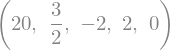

In [9]:
from sympy import Rational, Integer, S

B = 20
c2 = Rational(3, 2)
c1 = 1 - 2 * c2
chi = Integer(2)
kappa = S.Zero

B, c2, c1, chi, kappa

For these, the non-zero values of the arguments to `ACM_Hamiltonian` are:

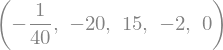

In [10]:
x1 = S.NegativeOne / 2 / B
x3 = B * c1 / 2
x4 = B * c2 / 2
x6 = -chi
x10 = kappa

x1, x3, x4, x6, x10

Then obtain the encoding of the Hamiltonian:

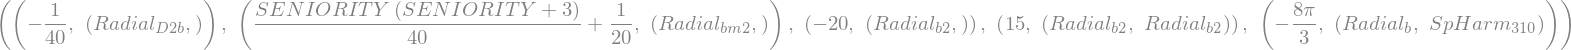

In [11]:
from acmpy.internal_operators import ACM_Hamiltonian

RWC_ham_fig5a = ACM_Hamiltonian(x1, 0, x3, x4, 0, x6, 0, 0, 0, x10)

RWC_ham_fig5a

## 2.2. Diagonalization of Hamiltonian using ACM_Scale

To diagonalize, we need to specify the values (a,$λ_0$) to determine the basis.
An unsophisticated choice is to use the SHO values a=sqrt(B) and $λ_0$=2.5.


In [12]:
from sympy import sqrt
from acmpy.full_space import ACM_Scale

%time _ = ACM_Scale(RWC_ham_fig5a, sqrt(B), 2.5, 0, 5, 0, 18, 0, 6)

Lowest eigenvalue is -6.34376. Relative eigenvalues follow (each divided by 1.00000):
  At L= 0: [    0.00,    1.56,    1.99,    2.86,    3.61,    4.09]
  At L= 2: [    0.10,    0.97,    1.74,    2.19,    2.38,    3.05]
  At L= 3: [    1.11,    2.70,    3.32,    4.58,    5.12,    5.43]
  At L= 4: [    0.30,    1.23,    1.92,    2.08,    2.41,    2.80]
  At L= 5: [    1.41,    2.20,    3.22,    3.64,    3.89,    4.47]
  At L= 6: [    0.61,    1.58,    2.35,    2.49,    2.83,    2.88]
CPU times: user 4.16 s, sys: 166 ms, total: 4.32 s
Wall time: 3.16 s


Let's increase the number of radial states until we achieve stability...

In [13]:
%time _ = ACM_Scale(RWC_ham_fig5a, sqrt(B), 2.5, 0, 10, 0, 18, 0, 6)

Lowest eigenvalue is -6.33961. Relative eigenvalues follow (each divided by 1.00000):
  At L= 0: [    0.00,    1.57,    2.12,    2.89,    3.61,    4.23]
  At L= 2: [    0.10,    0.97,    1.78,    2.25,    2.39,    3.16]
  At L= 3: [    1.11,    2.75,    3.37,    4.57,    5.07,    5.67]
  At L= 4: [    0.31,    1.24,    1.92,    2.11,    2.52,    2.82]
  At L= 5: [    1.43,    2.20,    3.24,    3.76,    3.94,    4.57]
  At L= 6: [    0.61,    1.58,    2.38,    2.54,    2.88,    2.91]
CPU times: user 8.66 s, sys: 210 ms, total: 8.87 s
Wall time: 7.47 s


In [14]:
%time _ = ACM_Scale(RWC_ham_fig5a, sqrt(B), 2.5, 0, 15, 0, 18, 0, 6)

Lowest eigenvalue is -6.33961. Relative eigenvalues follow (each divided by 1.00000):
  At L= 0: [    0.00,    1.57,    2.12,    2.89,    3.61,    4.23]
  At L= 2: [    0.10,    0.97,    1.78,    2.25,    2.39,    3.16]
  At L= 3: [    1.11,    2.75,    3.37,    4.57,    5.07,    5.67]
  At L= 4: [    0.31,    1.24,    1.92,    2.11,    2.52,    2.82]
  At L= 5: [    1.42,    2.20,    3.24,    3.76,    3.94,    4.57]
  At L= 6: [    0.61,    1.58,    2.38,    2.54,    2.88,    2.91]
CPU times: user 15 s, sys: 250 ms, total: 15.3 s
Wall time: 13.8 s


Thus, here, 10 radial states seem to be enough. We'll use that below.

## 2.3. Calculating transition rates and amplitudes

If transition rates and amplitudes are required, they are specified using
the following two procedures:

In [15]:
ACM_set_rat_lst(((2,0,1,1),(4,2,1,1),(6,4,1,1),(8,6,1,1)))

In [16]:
ACM_set_amp_lst(((2,2,1,1),))

Produce raw eigenvalues, transition rates and an amplitude.

In [17]:
%time _ = ACM_Scale(RWC_ham_fig5a, sqrt(B), 2.5, 0, 10, 0, 6, 0, 6)

Lowest eigenvalue is -6.33329. Relative eigenvalues follow (each divided by 1.00000):
  At L= 0: [    0.00,    1.63,    2.13,    3.19,    3.66,    4.23]
  At L= 2: [    0.13,    1.06,    2.05,    2.36,    2.71,    3.23]
  At L= 3: [    1.14,    3.02,    3.43,    5.15,    5.74,    7.29]
  At L= 4: [    0.32,    1.38,    2.09,    2.34,    2.63,    3.18]
  At L= 5: [    1.67,    2.48,    3.89,    4.72,    6.10,    6.98]
  At L= 6: [    0.70,    1.71,    2.62,    2.83,    3.10,    3.14]
Selected transition rates follow (each divided by 1.00000):
  B(E2: 2(1) -> 0(1)) =     0.12
  B(E2: 4(1) -> 2(1)) =     0.18
  B(E2: 6(1) -> 4(1)) =     0.21
Selected transition amplitudes follow (each divided by 1.00000):
  Amp( 2(1) -> 2(1) ) =    -0.23
CPU times: user 5.97 s, sys: 213 ms, total: 6.18 s
Wall time: 4.77 s


We can specify additional transition rates and amplitudes using

In [18]:
ACM_add_rat_lst(((2,2,1,1),(4,4,1,1),(6,6,1,1),(8,8,1,1)))